# Step 1: Get tweets and find their location

In [90]:
import numpy as np
import pandas as pd
import warnings
import math
warnings.filterwarnings('ignore')

tweets = pd.read_csv("output_got.csv", sep=None, error_bad_lines=False, warn_bad_lines=False)

us_states= {
    'Alabama': ['AL', 'Al', 'Birmingham', 'Montgomery'],
    'Alaska': ['AK', 'Ak', 'Anchorage', 'Fairbanks'],
    'Arizona': ['AZ', 'Az', 'Phoenix', 'Tucson'],
    'Arkansas': ['AR', 'Ar', 'Little Rock', 'Fort Smith'],
    'California': ['CA', 'Ca', 'Los Angeles', 'San Diego', 'San Francisco'],
    'Colorado': ['CO', 'Co', 'Denver', 'Colorado Springs'],
    'Connecticut': ['CT', 'Ct', 'Bridgeport', 'New Haven'],
    'Delaware': ['DE', 'De', 'Wilmington', 'Dover'],
    'Florida': ['FL', 'Fl', 'Jacksonville', 'Miami'],
    'Georgia': ['GA', 'Ga', 'Atlanta', 'Augusta'],
    'Hawaii': ['HI', 'Hi', 'Honolulu', 'Hilo'],
    'Idaho': ['ID', 'Id', 'Boise', 'Meridian'],
    'Illinois': ['IL', 'Il', 'Chicago', 'Aurora'],
    'Indiana': ['IN', 'Indianapolis', 'Fort Wayne'],
    'Iowa': ['IA', 'Ia', 'Des Moines', 'Cedar Rapids'],
    'Kansas': ['KS', 'Ks', 'Wichita', 'Overland Park'],
    'Kentucky': ['KY', 'Ky', 'Louisville', 'Lexington'],
    'Louisiana': ['LA', 'La', 'New Orleans', 'Baton Rouge'],
    'Maine': ['ME', 'Me', 'Portland', 'Lewiston'],
    'Maryland': ['MD', 'Md', 'Baltimore', 'Frederick'],
    'Massachusetts': ['MA', 'Ma', 'Boston', 'Worcester'],
    'Michigan': ['MI', 'Mi', 'Detroit', 'Grand Rapids'],
    'Minnesota': ['MN', 'Mn', 'Minneapolis', 'Saint Paul'],
    'Mississippi': ['MS', 'Ms', 'Jackson', 'Gulfport'],
    'Missouri': ['MO', 'Mo', 'Kansas City', 'Saint Louis', 'St. Louis'],
    'Montana': ['MT', 'Mt', 'Billings', 'Missoula'],
    'Nebraska': ['NE', 'Ne', 'Omaha', 'Lincoln'],
    'Nevada': ['NV', 'Ne', 'Las Vegas', 'Henderson'],
    'New Hampshire': ['NH', 'Nh', 'Manchester', 'Nashua'],
    'New Jersey': ['NJ', 'Nj', 'Newark', 'Jersey City'],
    'New Mexico': ['NM', 'Nm', 'Albuquerque', 'Las Cruces'],
    'New York': ['NY', 'Ny', 'NYC', 'Brooklyn','Buffalo'],
    'North Carolina': ['NC', 'Nc', 'Charlotte', 'Raleigh'],
    'North Dakota': ['ND', 'Nd', 'Fargo', 'Bismarck'],
    'Ohio': ['OH', 'Oh', 'Columbus', 'Cleveland'],
    'Oklahoma': ['OK', 'Ok', 'Oklahoma City', 'Tulsa'],
    'Oregon': ['OR', 'Or', 'Portland', 'Salem'],
    'Pennsylvania': ['PA', 'Pa', 'Philadelphia', 'Pittsburgh'],
    'Rhode Island': ['RI', 'Ri', 'Providence', 'Warwick'],
    'South Carolina': ['SC', 'Sc', 'Charleston', 'Columbia'],
    'South Dakota': ['SD', 'Sd', 'Sioux Falls', 'Rapid City'],
    'Tennessee': ['TN', 'Tn', 'Nashville', 'Memphis'],
    'Texas': ['TX', 'Tx', 'Houston', 'San Antonio'],
    'Utah': ['UT', 'Ut', 'Salt Lake City', 'West Valley City'],
    'Vermont': ['VT', 'Vt', 'Burlington', 'Essex'],
    'Virginia': ['VA', 'Va', 'Virginia Beach', 'Norfolk'],
    'Washington': ['WA', 'Wash.', 'Wash', 'Washington State', 'Wa', 'Seattle', 'Spokane'],
    'West Virginia': ['WV', 'Wv', 'Charleston', 'Huntington'],
    'Wisconsin': ['WI', 'Wi', 'Milwakee', 'Madison'],
    'Wyoming': ['WY', 'Wy', 'Cheyenne', 'Casper'],
}

locations = tweets['Geo'].tolist()

#Number of tweets from each state
state_counts = {state: 0 for state in us_states}

cleaned_locations = []

for idx, tweet in tweets.iterrows():
    location= tweet['Geo']
    if type(location) is str and all(name not in location for name in['DC', 'D.C.','Washington, DC', 'Washington, D.C.', 'Washington DC','Washington D.C.', 'WASH. D.C.']):
        found_state = False
        d = {'Text':tweet['Text'], 'Hashtags': tweet['Hashtags']}
        for key, values in us_states.items():
            if key.lower() in location.lower():
    #                 print (location)
    #                 print (key)
    #                 print ()
                found_state = True
                state_counts[key] += 1
                d['Location'] = key
                cleaned_locations.append(d)
                break
            else:
                for value in values:
                    if len(value) == 2:
                        if value in location.replace(',','').split():
#                             print (location)
#                             print (value)
#                             print ()
                            found_state = True
                            state_counts[key] +=1
                            d['Location'] = key
                            cleaned_locations.append(d)
                            break
                    elif value in location:
#                         print (location)
#                         print (value)
#                         print ()
                        found_state = True
                        state_counts[key] += 1
                        d['Location'] = key
                        cleaned_locations.append(d)
                        break
                    elif len(value) > 2 and value.lower() in location.lower():
#                         print (location)
#                         print (value)
#                         print ()
                        found_state = True
                        state_counts[key] +=1
                        d['Location'] = key
                        cleaned_locations.append(d)
                        break
            if found_state == True:
                break
#         if found_state == False:
#             print (location)
#             print ()
            
                
tweets = pd.DataFrame(cleaned_locations)

print (state_counts)

print("Number of tweets from US states:", len(tweets.index))

{'Alabama': 39, 'Alaska': 4, 'Arizona': 79, 'Arkansas': 55, 'California': 838, 'Colorado': 172, 'Connecticut': 92, 'Delaware': 16, 'Florida': 356, 'Georgia': 112, 'Hawaii': 17, 'Idaho': 21, 'Illinois': 239, 'Indiana': 75, 'Iowa': 29, 'Kansas': 39, 'Kentucky': 34, 'Louisiana': 54, 'Maine': 70, 'Maryland': 84, 'Massachusetts': 175, 'Michigan': 92, 'Minnesota': 55, 'Mississippi': 15, 'Missouri': 72, 'Montana': 13, 'Nebraska': 10, 'Nevada': 48, 'New Hampshire': 37, 'New Jersey': 94, 'New Mexico': 34, 'New York': 777, 'North Carolina': 148, 'North Dakota': 4, 'Ohio': 127, 'Oklahoma': 18, 'Oregon': 52, 'Pennsylvania': 144, 'Rhode Island': 13, 'South Carolina': 41, 'South Dakota': 3, 'Tennessee': 57, 'Texas': 311, 'Utah': 19, 'Vermont': 28, 'Virginia': 176, 'Washington': 158, 'West Virginia': 1, 'Wisconsin': 37, 'Wyoming': 1}
Number of tweets from US states: 5185


# Step 2: Web Scrape from StatusOfWomen.org to get state rankings in each womens issue

In [91]:
from bs4 import BeautifulSoup
from pandas import DataFrame as dataF
import requests
import time

url = "https://statusofwomendata.org/state-data/"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/62.0.3202.94 Safari/537.36"}
stateNames = []
employmentEarn = []
politicalPart = []
povertyOpp = []
reprodRights = []
healthWell = []
workFam = []

page = requests.get(url, headers=headers)
time.sleep(0.5)
soup = BeautifulSoup(page.text, "lxml")
statesList = soup.find("article", class_="post").find_all("p")

for state in statesList:
    statePage = requests.get(state.find("a").get("href"), headers=headers)
    time.sleep(0.5)
    stateSoup = BeautifulSoup(statePage.text, "lxml")
    name = stateSoup.find("div", class_="state").find("h1").text
    stateNames.append(name)
    
    reportCard = stateSoup.find("div", class_="cardSummary").find_all("tr")[1:]
    employmentEarn.append(reportCard[0].find_all("td")[1].text)
    if(reportCard[1].find_all("td")[1].text == "-"):
        politicalPart.append("0")
    else:
        politicalPart.append(reportCard[1].find_all("td")[1].text)
    povertyOpp.append(reportCard[2].find_all("td")[1].text)
    reprodRights.append(reportCard[3].find_all("td")[1].text)
    healthWell.append(reportCard[4].find_all("td")[1].text)
    workFam.append(reportCard[5].find_all("td")[1].text)


# Step 3: Write each state's ranking as well as tweets per person into state_rankings.csv

In [92]:
populations = {'Alabama': 4863300,
    'Alaska': 741894,
    'Arizona': 6931071,
    'Arkansas': 2988248,
    'California': 39250017,
    'Colorado': 5540545,
    'Connecticut': 	3576452,
    'Delaware': 952065,
    'District Of Columbia': 681170,
    'Florida': 20612439,
    'Georgia': 10310371,
    'Hawaii': 1428557,
    'Idaho': 1683140,
    'Illinois': 12801539,
    'Indiana': 6633053,
    'Iowa': 3134693,
    'Kansas': 2907289,
    'Kentucky': 4436974,
    'Louisiana': 4681666,
    'Maine': 1331479,
    'Maryland': 6016447,
    'Massachusetts': 6811779,
    'Michigan': 9928300,
    'Minnesota': 5519952,
    'Mississippi': 2988726,
    'Missouri': 6093000,
    'Montana': 1042520,
    'Nebraska': 1907116,
    'Nevada': 2940058,
    'New Hampshire': 1334795,
    'New Jersey': 8944469,
    'New Mexico': 2081015,
    'New York': 19745289,
    'North Carolina': 10146788,
    'North Dakota': 757952,
    'Ohio': 11614373,
    'Oklahoma': 3923561,
    'Oregon': 4093465,
    'Pennsylvania': 12784227,
    'Rhode Island': 1056426,
    'South Carolina': 4961119,
    'South Dakota': 865454,
    'Tennessee': 6651194,
    'Texas': 27862596,
    'Utah': 3051217,
    'Vermont': 624594,
    'Virginia': 8411808,
    'Washington': 7288000,
    'West Virginia': 1831102,
    'Wisconsin': 5778708,
    'Wyoming': 585501,
}

for state, count in state_counts.items():
    population = populations[state]
    state_counts[state] = (state_counts[state]/population)

state_counts_df = pd.DataFrame(list(state_counts.items()), columns=['Name', 'Tweets Per Person'])

stateRankings = dataF({"Name": stateNames, "Employment & Earnings": employmentEarn, "Political Participation": politicalPart, "Poverty & Opportunity": povertyOpp, "Reproductive Rights": reprodRights, "Health & Well-Being": healthWell, "Work & Family": workFam})
stateRankings = stateRankings[["Name","Employment & Earnings", "Political Participation", "Poverty & Opportunity","Reproductive Rights", "Health & Well-Being", "Work & Family"]]

stateRankings.loc[stateRankings['Name'] == 'District Of Columbia', 'Political Participation'] = 25

stateRankings = stateRankings.drop(stateRankings[stateRankings.Name == 'District Of Columbia'].index)

stateRankings = stateRankings.merge(state_counts_df, on="Name")
stateRankings.to_csv("state_rankings.csv", index=False)

# Step 4: Perform linear regression on state_rankings.csv to see which womens issue has the most influence on the number of tweets per state

In [93]:
import pandas as pd
from pandas import DataFrame as df
from pandas import Series as sr
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression as lr

In [94]:
data = pd.read_csv("state_rankings.csv")

data.index = data.Name
data.drop("Name", axis=1, inplace=True)
data.sample(5)

,Employment & Earnings,Political Participation,Poverty & Opportunity,Reproductive Rights,Health & Well-Being,Work & Family,Tweets Per Person
Name,,,,,,,
Delaware,12,30,19,20,34,25,0.000017
Arizona,34,14,35,24,28,38,0.000011
Hawaii,18,17,5,5,2,13,0.000012
Washington,17,4,15,10,14,14,0.000022
Vermont,8,13,9,2,8,16,0.000045


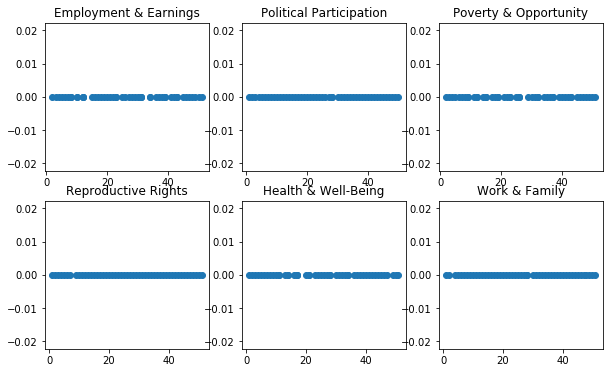

In [95]:
x = data.values[:, :6]
y = data.values[:, 6]

fig, axes = plt.subplots(2, 3, figsize=(10, 6))

for i in range(6):
    j = i//3
    k = i%3
    axes[j][k].scatter(x[:, i].reshape(-1, 1), y)
    axes[j][k].set_title(data.columns[i])
plt.show()

### all attributes:

In [96]:
model = sm.OLS(y, x)
result = model.fit()
param_ref = result.params
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     5.813
Date:                Fri, 08 Dec 2017   Prob (F-statistic):           0.000159
Time:                        20:46:40   Log-Likelihood:                 490.55
No. Observations:                  50   AIC:                            -969.1
Df Residuals:                      44   BIC:                            -957.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -1.269e-07   4.48e-07     -0.283      0.7

### one attribute at a time

In [80]:
for i in range(6):
    model2 = lr()
    model2.fit(x[:, i].reshape(-1, 1), y)
    model2.predict(x[:, i].reshape(-1, 1))
    print(data.columns[i], "r-squared score:")
    print(model2.score(x[:, i].reshape(-1, 1), y))

Employment & Earnings r-squared score:
0.24455922652
Political Participation r-squared score:
0.176616344849
Poverty & Opportunity r-squared score:
0.214755397472
Reproductive Rights r-squared score:
0.198952405984
Health & Well-Being r-squared score:
0.0694707173373
Work & Family r-squared score:
0.130733566519


### attribute's influence

In [81]:
for i in range(6):
    param_ref_temp = np.delete(param_ref, i, 0)
    model = sm.OLS(y, np.delete(x, i, 1))
    result = model.fit()
    param_ref1 = result.params
    print(data.columns[i]+"\'s influence:")
    print(sum(np.divide(abs(param_ref1 - param_ref_temp), abs(param_ref_temp))))

Employment & Earnings's influence:
1.64513489932
Political Participation's influence:
0.372359347292
Poverty & Opportunity's influence:
0.775196190011
Reproductive Rights's influence:
0.65188593022
Health & Well-Being's influence:
9.30095910666
Work & Family's influence:
5.51403922682


In [82]:
import pandas as pd
import numpy as np

# from matplotlib import pyplot as plt
import matplotlib

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction import text
from sklearn.decomposition import LatentDirichletAllocation,TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
from sklearn.metrics import silhouette_score

import warnings
import math
warnings.filterwarnings('ignore')

# Step 5: Kmeans Clustering

In [14]:
state_ranks_df = pd.read_csv("state_rankings.csv")
state_ranks_df.index = state_ranks_df.Name
state_ranks_df.drop(["Name","Tweets Per Person"], axis=1, inplace=True)
state_ranks_df.head(5)

,Employment & Earnings,Political Participation,Poverty & Opportunity,Reproductive Rights,Health & Well-Being,Work & Family
Name,,,,,,
Alabama,46,41,45,40,50,39
Alaska,7,33,12,29,27,15
Arizona,34,14,35,24,28,38
Arkansas,47,47,50,43,47,8
California,15,8,23,9,17,2


In [15]:
n_topics = 4

def get_kmeans(data, k, scale=True):
    if scale:
        s = MinMaxScaler()
        data = s.fit_transform(data)
    
    m = KMeans(n_clusters=k, random_state=0).fit(data)
    d = m.predict(data)
    return m, d        

kmean_m, kmean_d = get_kmeans(state_ranks_df, n_topics, scale=False)

In [16]:
state_ranks_df['Cluster'] = kmean_m.labels_.tolist()
state_ranks_df.head(5)

,Employment & Earnings,Political Participation,Poverty & Opportunity,Reproductive Rights,Health & Well-Being,Work & Family,Cluster
Name,,,,,,,
Alabama,46,41,45,40,50,39,2
Alaska,7,33,12,29,27,15,0
Arizona,34,14,35,24,28,38,3
Arkansas,47,47,50,43,47,8,2
California,15,8,23,9,17,2,0


# Step 6: LDA

In [18]:
tweets = pd.read_csv("output_got.csv", sep=None, error_bad_lines=False, warn_bad_lines=False)

texts = tweets['Text'].tolist() 

#Words to ignore
stop_words = text.ENGLISH_STOP_WORDS.union(frozenset(['http','https', 'don', 'gl','www','twitter', 
                                                      'got','bit','women', 'woman', 'like', 'thank', 'instagram', 'fb', 'ly', 
                                                      'goo', 'status', 'atus', 'st', 'tatus','repost', 'did', 'sta', 'tus', 'youtu', 
                                                      'com', 'pic','statu', 'facebook', 'youtube', 'li', 'll', '01', '2017', 
                                                      'make', 'let', 'need', '31', 'rt', 'ln', 'html']))
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
    
def LDA(documents, max_df=0.95, min_df=2, max_features=1000, n_topics=20, n_top_words=10):
    '''
     tf_vectorizer:
       - Strips out “stop words”
       - Filters out terms that occur in more than 95% of the docs (max_df=0.95)
       - Filters out terms that occur in only one document (min_df=2).
       - Selects the 1,000 most frequently occuring words in the corpus.
       - Normalizes the vector (L2 norm of 1.0) to normalize the effect of 
         document length on the tf_vectorizer values. 
    '''
    tf_vectorizer = CountVectorizer(max_df=max_df, min_df=min_df, max_features=max_features, stop_words=stop_words)
    tf = tf_vectorizer.fit_transform(documents)
    tf_feature_names = tf_vectorizer.get_feature_names()
    
    lda = LatentDirichletAllocation(n_topics=n_topics, max_iter=20, learning_method='online', \
                                    learning_offset=50.,random_state=0).fit(tf)

    display_topics(lda, tf_feature_names, n_top_words)
#     print (lda.transform(tf))
    
LDA(texts)

Topic 0:
rights fight yes trump ve refugeeswelcome join human hillary washingtonpost
Topic 1:
time history senators 100 postcard heard send voices source twi
Topic 2:
trump today good vote donald men bio life president pro
Topic 3:
resist nobannowall la resisttrump theresistance white look thanks equality stopsessions
Topic 4:
week nomuslimban new want feminist hope soros use things amazing
Topic 5:
protests feminism proud sessions mmflint feminists huffingtonpost 50 lsarsour learn
Topic 6:
maga marchforlife real march photo rebekahworsham pink pussy mt etsy
Topic 7:
stat great liberals democrats nytimes linda senfeinstein sarsour reflections americafirst
Topic 8:
resistance just stoppresidentbannon resist going impeach fighting los voice womensrightsarehumanrights
Topic 9:
march womens org muslimbanprotest sign washington sharia read latest paper
Topic 10:
womensmarchonwashington news girl know womensrights weekend story hey violence start
Topic 11:
sciencemarch marching dumptrump nob